# Importing Libraries

In [7]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

warnings.filterwarnings('ignore')

# Data Exploration

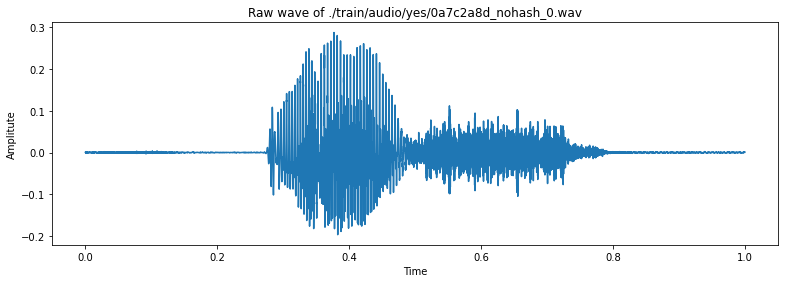

In [8]:
train_audio_path = './train/audio'
samples, sample_rate = librosa.load(train_audio_path+'/yes/0a7c2a8d_nohash_0.wav', sr = 16000)

plt.figure(figsize = (13, 9))

plt.subplot(2, 1, 1)

plt.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
plt.xlabel("Time")
plt.ylabel("Amplitute")
plt.title('Raw wave of ' + './train/audio/yes/0a7c2a8d_nohash_0.wav')
plt.show()

In [9]:
ipd.Audio(samples, rate=sample_rate)

In [10]:
# Let's see the sample rate
print(sample_rate)

16000


**Resampling**

From the above, we can understand that the sampling rate of the signal is 16000 hz. Let us resample it to 8000 hz since most of the speech related frequencies are present in 8000z 

In [11]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [12]:
labels=os.listdir(train_audio_path)

print(labels)

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


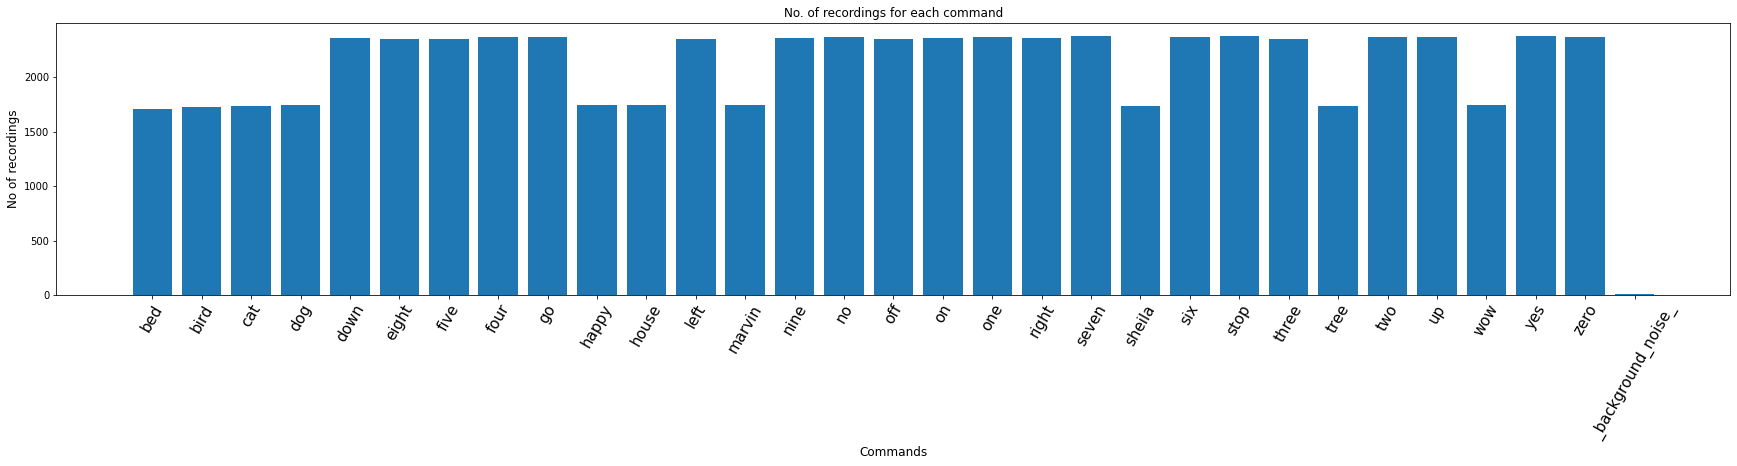

In [13]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))

index = np.arange(len(labels))

plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [14]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

**Duration of recordings**

What’s next? A look at the distribution of the duration of recordings:

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

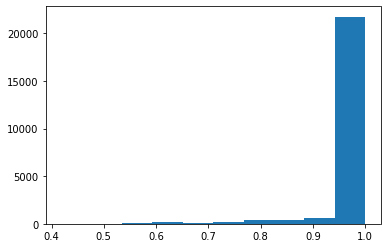

In [15]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

# Data Preprocessing

In [16]:
train_audio_path = './train/audio/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


Convert the output labels to integer encoded:

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [18]:
y.shape

(21312,)

Now, convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:

In [19]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:

In [20]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
all_wave

array([[[-2.88872398e-03],
        [-4.09192173e-03],
        [-3.25268088e-03],
        ...,
        [-7.19285978e-04],
        [-1.12521090e-03],
        [-1.30131142e-03]],

       [[ 4.03327926e-04],
        [ 6.26417692e-04],
        [ 3.67147470e-04],
        ...,
        [ 8.11780745e-04],
        [ 4.86697943e-04],
        [ 7.11379049e-04]],

       [[-1.58481183e-04],
        [-1.79531227e-04],
        [-1.15519455e-04],
        ...,
        [ 4.31013264e-04],
        [ 3.31727992e-04],
        [ 3.07029666e-04]],

       ...,

       [[-1.52462671e-04],
        [-2.13622799e-04],
        [-1.75312554e-04],
        ...,
        [ 4.78350848e-04],
        [ 3.12889199e-04],
        [ 2.94630474e-04]],

       [[-5.92960969e-05],
        [-1.66434096e-04],
        [-1.80037678e-04],
        ...,
        [ 1.01546226e-04],
        [-4.89999038e-05],
        [-1.18220858e-04]],

       [[ 1.62130367e-04],
        [ 4.54971945e-04],
        [ 3.75219883e-04],
        ...,
        

**Split into train and validation set**

Next, we will train the model on 80% of the data and validate on the remaining 20%:


In [21]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [22]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

**Model Architecture for this problem**

We will build the speech-to-text model using conv1d. Conv1d is a convolutional neural network which performs the convolution along only one dimension. 

**Model building**

Let us implement the model using Keras functional API.

In [23]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

Define the loss function to be categorical cross-entropy since it is a multi-classification problem:

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

Let us train the model on a batch size of 32 and evaluate the performance on the holdout set:

In [27]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - ETA: 0s - loss: 2.0241 - accuracy: 0.2335
Epoch 00001: val_accuracy improved from -inf to 0.42505, saving model to best_model.hdf5
533/533 [==============================] - 60s 110ms/step - loss: 2.0241 - accuracy: 0.2335 - val_loss: 1.5814 - val_accuracy: 0.4251
Epoch 2/100
533/533 [==============================] - ETA: 0s - loss: 1.5049 - accuracy: 0.4335
Epoch 00002: val_accuracy improved from 0.42505 to 0.55876, saving model to best_model.hdf5
533/533 [==============================] - 65s 122ms/step - loss: 1.5049 - accuracy: 0.4335 - val_loss: 1.2683 - val_accuracy: 0.5588
Epoch 3/100
533/533 [==============================] - ETA: 0s - loss: 1.2853 - accuracy: 0.5301
Epoch 00003: val_accuracy improved from 0.55876 to 0.59840, saving model to best_model.hdf5
533/533 [==============================] - 62s 117ms/step - loss: 1.2853 - accuracy: 0.5301 - val_loss: 1.1271 - val_accuracy: 0.5984
Epoch 4/100
533/533 [=============

Epoch 28/100
533/533 [==============================] - ETA: 0s - loss: 0.3579 - accuracy: 0.8756
Epoch 00028: val_accuracy did not improve from 0.84307
533/533 [==============================] - 59s 110ms/step - loss: 0.3579 - accuracy: 0.8756 - val_loss: 0.5170 - val_accuracy: 0.8344
Epoch 29/100
533/533 [==============================] - ETA: 0s - loss: 0.3542 - accuracy: 0.8775
Epoch 00029: val_accuracy did not improve from 0.84307
533/533 [==============================] - 58s 110ms/step - loss: 0.3542 - accuracy: 0.8775 - val_loss: 0.4972 - val_accuracy: 0.8391
Epoch 30/100
533/533 [==============================] - ETA: 0s - loss: 0.3413 - accuracy: 0.8822
Epoch 00030: val_accuracy did not improve from 0.84307
533/533 [==============================] - 59s 110ms/step - loss: 0.3413 - accuracy: 0.8822 - val_loss: 0.5503 - val_accuracy: 0.8198
Epoch 31/100
533/533 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8845
Epoch 00031: val_accuracy did not improve

**Diagnostic plot**

I’m going to lean on visualization again to understand the performance of the model over a period of time:

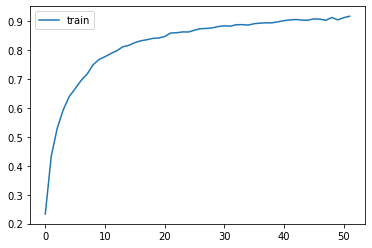

In [32]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
# pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

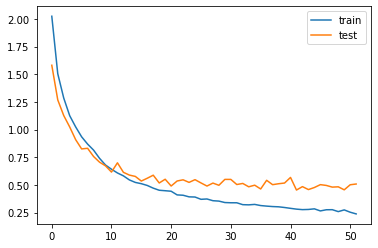

In [33]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Loading the best model**

In [34]:
from keras.models import load_model
model=load_model('best_model.hdf5')

Define the function that predicts text for the given audio:

In [35]:
def predict(audio):
    print(type(audio))
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

Prediction time! Make predictions on the validation data:

In [36]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: on


In [37]:
print("Text:",predict(samples))

<class 'numpy.ndarray'>
Text: on


The best part is yet to come! Here is a script that prompts a user to record voice commands. Record your own voice commands and test it on the model:

In [53]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

start
end


Let us now read the saved voice command and convert it to text:

In [54]:
filepath='.'

#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + 'yes.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

In [55]:
print("Text:",predict(samples))

<class 'numpy.ndarray'>
Text: down


In [41]:
model.evaluate(x_val, y_val)

134/134 [==============================] - 5s 35ms/step - loss: 0.4562 - accuracy: 0.8593


[0.4561627507209778, 0.8592540621757507]